# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 1381 Исайкин Георгий Иванович и Петров Александр Сергеевич. Вариант №4.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

#### Дискретное преобразование Фурье (ДПФ)
Это математический метод, позволяющий преобразовать дискретный сигнал $x$ в его частотную компоненту, что позволяет анализировать его частотные характеристики. ДПФ определяется формулой
$$X(n)=\sum_{k=0}^{N-1}x_k\exp(-i\frac{2\pi n}Nk)$$
или
$$X(\omega)=\sum_{k=0}^{N-1}x_ke^{-i\omega k}$$
где $\omega=\frac{2\pi n}N$

#### Линейное сглаживание
Это фильтр, который преобразует входной сигнал $x$ в выходной $y$ по формуле
$$y_n=\frac1{2m+1}\sum_{k=-m}^{m}x_{n+k}$$

Передаточная функция имеет вид
$$H(\omega)=\frac1{2m+1}\left(1+\sum_{k=1}^m\cos(\omega k)\right)$$
или по другому
$$𝐻(\omega)=\frac{sin(\frac{𝑁\omega}{2})}{Nsin⁡(\frac{\omega}{2})}$$
где $N=2m+1$

#### Формула численного дифференцирования
Это фильтр, который преобразует входной дискретный сигнал в его дифференциал
$$y_{n+1}=\frac{x_{n+1}-x_{n-1}}2$$

Передаточная функция имеет вид
$$H(\omega)=i\sin(\omega)$$

#### Квадратурные формулы
Это формулы филтров для численного интегрирования выходного сигнала $y_n$. В работе применяются следующие формулы:
- **Формула прямоугольников:**
$$y_{n+1}=y_n+x_{n+\frac12},~y_0=0$$
- **Формула трапеций:**
$$y_{n+1}=y_n+\frac12(x_n+x_{n+1}),~y_0=0$$
- **Формула Симпсона:**
$$y_{n+1}=y_n+\frac13(x_{n-1}+4x_n+x_{n+1}),~y_0=0$$

Передаточная функция имеет вид:
- **Формула прямоугольников:**
$$H(\omega)=\frac1{2i\sin(\frac12\omega)}$$
- **Формула трапеций:**
$$H(\omega)=\frac{\cos(\frac12\omega)}{2i\sin(\frac12\omega)}$$
- **Формула Симпсона:**
$$H(\omega)=\frac{\cos(\omega)+2}{3i\sin(\omega)}$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.fftpack import fft, fftfreq
from numpy.polynomial.polynomial import Polynomial
from scipy.signal import savgol_filter

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $Ak$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

In [24]:
def signal(normalize=True):
    # Определяем значения переменных
    A = np.random.randint(1, 12, 11)
    if normalize:
        A = A / np.sum(A)
    omega = np.linspace(0, 1, 11) * np.pi
    phi = np.random.uniform(0, 0.5, 11)

    # Определяем функцию ряда
    f = lambda t: np.sum(A * np.cos(omega * t + phi))
    return f

def discrete(f):
    # Определяем временной ряд
    df = pd.DataFrame({'t': range(32)})

    # Определяем дискретные значения сигнала на ряду 
    df['s'] = df['t'].apply(f)
    return df

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

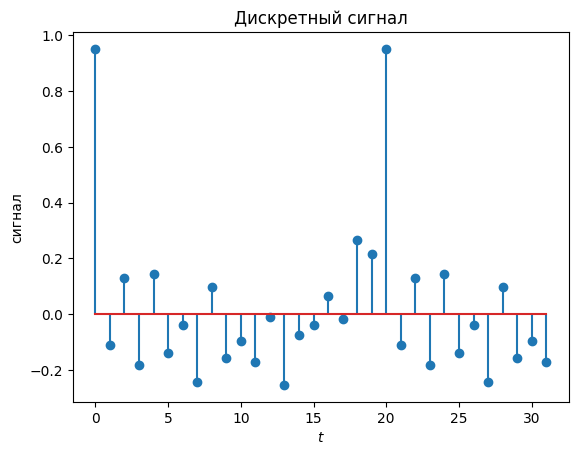

<Axes: title={'center': 'Аналоговый сигнал'}, xlabel='$t$', ylabel='сигнал'>

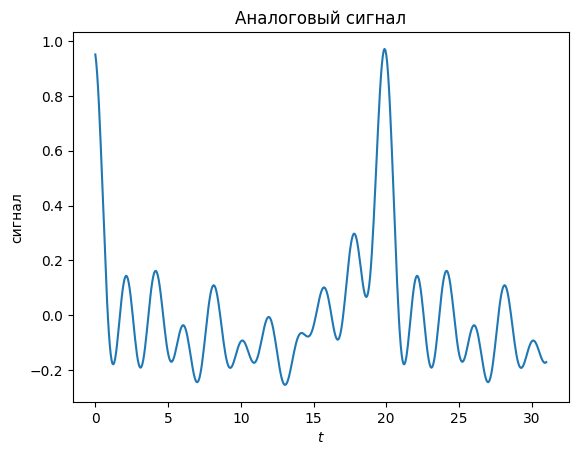

In [25]:
# Создаём функцию сигнала
f = signal()

# Формируем дискретный сигнал
df = discrete(f)

# Рисуем дискретный сигнал
plt.stem(df['t'], df['s'])
plt.xlabel('$t$')
plt.ylabel('сигнал')
plt.title('Дискретный сигнал')
plt.show()

# Определяем временной ряд
t = np.linspace(0, 31, 500)

# Рисуем аналоговый сигнал
plt.xlabel('$t$')
plt.ylabel('сигнал')
plt.title('Аналоговый сигнал')
sns.lineplot(x=t, y=map(f, t))

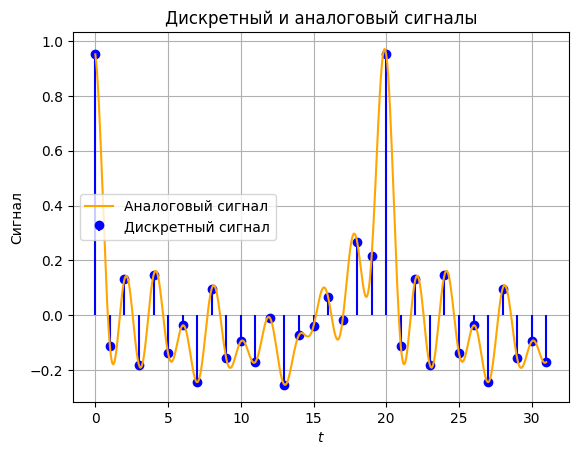

In [26]:
# Рисуем дискретный и аналоговый сигналы на одном графике
plt.stem(df['t'], df['s'], basefmt=" ", label='Дискретный сигнал', linefmt='b-', markerfmt='bo')
plt.plot(t, list(map(f, t)), label='Аналоговый сигнал', color='orange')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Дискретный и аналоговый сигналы')
plt.legend()
plt.grid()
plt.show()

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


Преобразование фурье сигнала $s$ имеет вид
$$S(n)=\sum_{k=0}^{N-1}s_k\cdot\exp\left(-ik\frac{2\pi n}N\right)$$
или
$$S(\omega)=\sum_{k=0}^{N-1}s_k\cdot e^{-ik\omega}$$
где $\omega=\frac{2\pi n}N$

Воспользуемся второй формой что бы по ДПФ вычислять отсчеты спектра дискретного сигнала по частоте <!-- 4 лекция 16 слайд -->

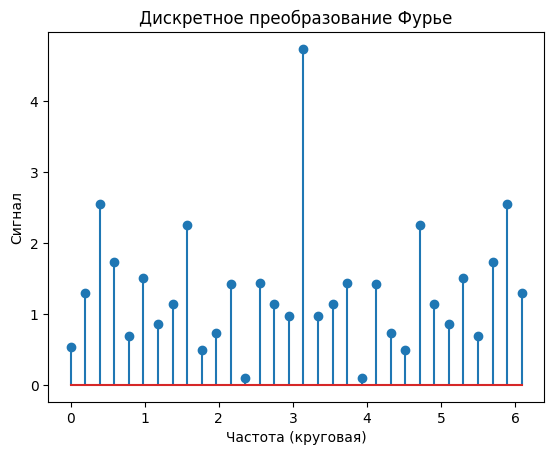

In [27]:
# Дискретное преобразование Фурье (ДПФ)
def furie(sig, n):
    return sum(sig[k] * np.exp(-1j * 2 * np.pi * n * k / 32) for k in range(32))
    
# Определение и подсчёт значений ДПФ
df['w'] = df['t'].apply(lambda n: 2 * np.pi * n / 32)
df['S'] = df['t'].apply(lambda n: furie(df['s'], n))

# Рисуем ДПФ
plt.stem(df['w'], np.abs(df['S']))
plt.xlabel('Частота (круговая)')
plt.ylabel('Сигнал')
plt.title('Дискретное преобразование Фурье')
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $2m+1$ точкам происходит по формуле
$$y_n=\frac1{2m+1}\sum_{k=-m}^{m}x_{n+k}$$

Формула передаточной функции для линейного сглаживания по $2m+1$ точкам имеет вид
$$H(\omega)=\frac1{2m+1}\left(1+\sum_{k=1}^m\cos(\omega k)\right)$$
или
$$𝐻(\omega)=\frac{sin(\frac{𝑁\omega}{2})}{Nsin⁡(\frac{\omega}{2})}$$
где $N=2m+1$

In [28]:
# Реализация линейного сглаживания
def linear_smoothing(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

# Сглаживание по 5 и 9 точкам
df['y5'] = linear_smoothing(df['s'], 5)
df['y9'] = linear_smoothing(df['s'], 9)

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

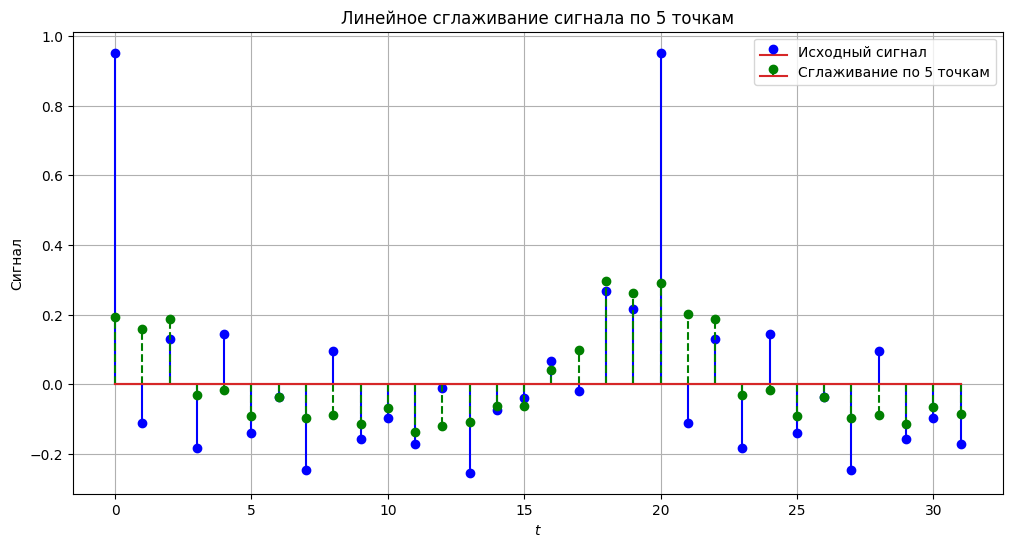

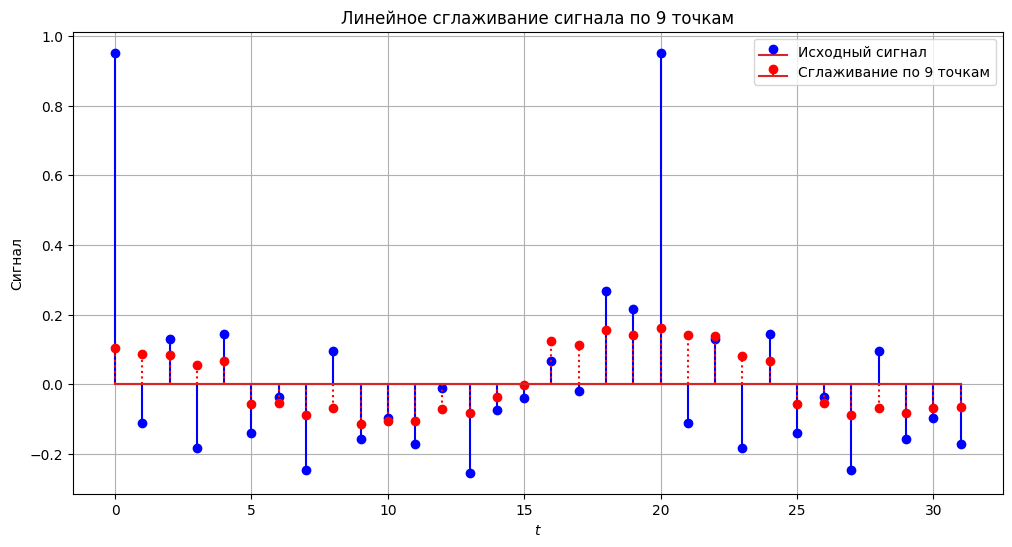

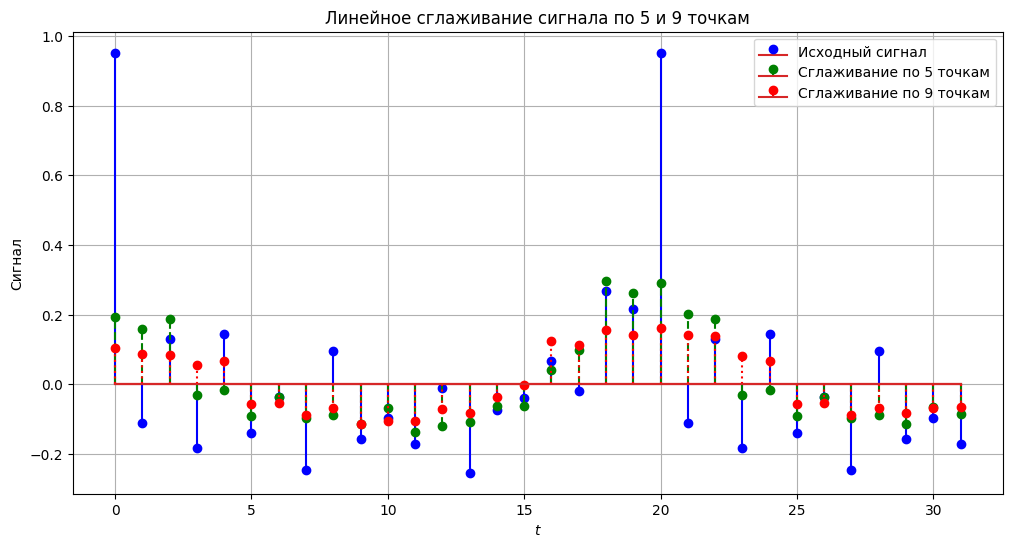

In [29]:
# Рисуем график линейного сглаживания по 5 точкам и график исходного сигнала 
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 5 точкам')
plt.legend()
plt.grid()
plt.show()

# Рисуем график линейного сглаживания по 9 точкам и график исходного сигнала 
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 9 точкам')
plt.legend()
plt.grid()
plt.show()

# Рисуем график линейного сглаживания по 5 и по 9 точкам и график исходного сигнала 
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.stem(df['t'], df['y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 5 и 9 точкам')
plt.legend()
plt.grid()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

ДПФ высчитывается аналогично 4 заданию.

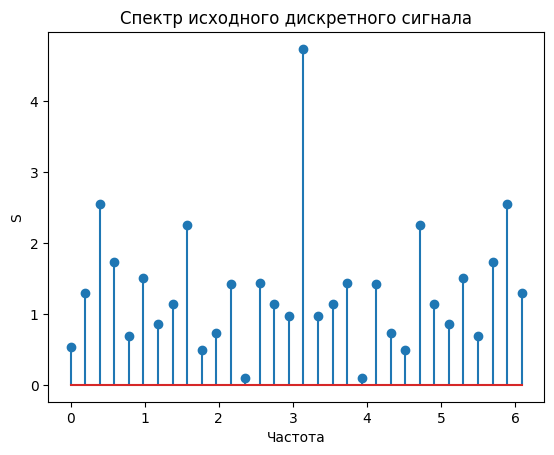

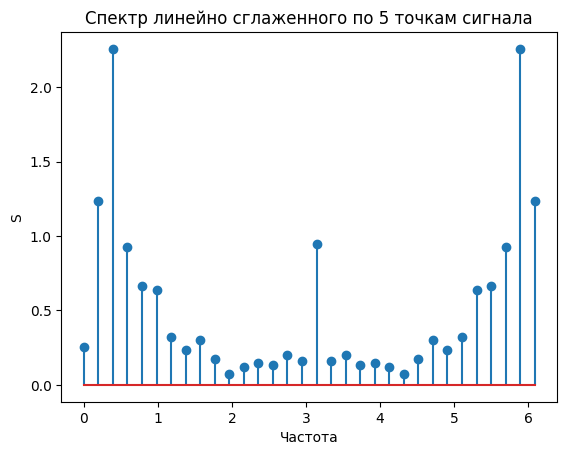

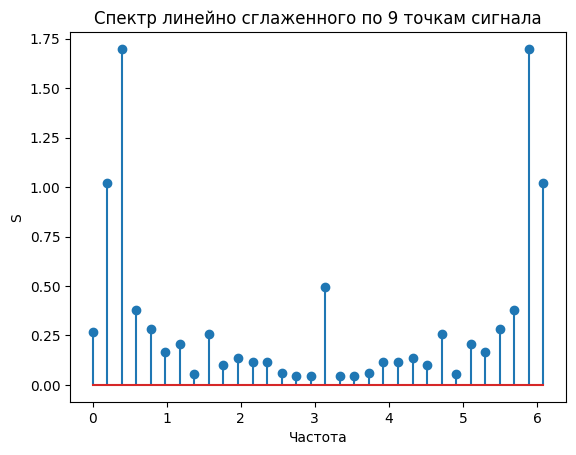

In [30]:
# ДПФ для сглаженного сигнала (5 точек)
df['Y5'] = df['t'].apply(lambda n: furie(df['y5'], n))

# ДПФ для сглаженного сигнала (9 точек)
df['Y9'] = df['t'].apply(lambda n: furie(df['y9'], n))

# Рисуем график спектра исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

# Рисуем график спектра линейного сглаживания по 5 точкам
plt.stem(df['w'], np.abs(df['Y5']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр линейно сглаженного по 5 точкам сигнала')
plt.show()

# Рисуем график спектра линейного сглаживания по 9 точкам
plt.stem(df['w'], np.abs(df['Y9']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр линейно сглаженного по 9 точкам сигнала')
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H({\omega})$. Сделать выводы.

#### Анализ результатов фильтрации и соответствия значениям $H(\omega)$
1. Передаточная функция фильтров:

* Передаточная функция $H(\omega)$ определяет поведение фильтров в частотной области.

* Фильтры, построенные на формулах численного дифференцирования, усиливают высокие частоты сигнала, а фильтры, построенные на формулах численного интегрирования, сглаживают сигнал, подавляя высокочастотные компоненты исходного сигнала.


2. Результаты спектрального анализа:

1) Численное дифференцирование:

- Спектры после фильтрации показывают значительное усиление высокочастотных составляющих.

- Низкочастотные компоненты подавлены, что делает сигнал более подверженным шуму.


2) Численное интегрирование:

- Спектры после фильтрации методами прямоугольников, трапеций и Симпсона демонстрируют подавление высокочастотных шумов.

- Низкочастотные компоненты усиливаются, причём эффект сглаживания наиболее выражен при использовании метода Симпсона.


3. Соответствие спектров фильтрованных сигналов передаточной функции $H(\omega)$:

1) Теоретические ожидания совпадают с результатами спектрального анализа:

    - Для дифференцирования: усиление амплитуд высоких частот соответствует линейной зависимости $i\omega$.

    - Для интегрирования: снижение амплитуд высоких частот пропорционально обратной зависимости $\frac{1}{i\omega}$

2) Низкочастотные компоненты сохраняются, что подтверждает корректность реализации интегрирующих фильтров.


4. Вывод:

- Численное дифференцирование усиливает высокочастотные составляющие, что может быть полезно для анализа быстрых изменений, но делает сигнал более шумным.

- Численное интегрирование эффективно сглаживает сигнал, подавляя высокочастотные шумы и усиливая низкочастотные компоненты.

- Метод Симпсона даёт наиболее точные результаты, обеспечивая лучшее сглаживание без значительной потери низкочастотной информации.

- Все результаты соответствуют теоретическим передаточным функциям $H(\omega)$, подтверждая правильность фильтров.



### Задание 8
Повторить п. 4–7 для следующих фильтров:
- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

#### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
Дифференцирование 1-го порядка происходит по формуле
$$y_{n+1}=\frac{x_{n+1}-x_{n-1}}2$$

Формула передаточной функции для дифференцирования 1-го порядка имеет вид
$$H(\omega)=i\sin(\omega)$$

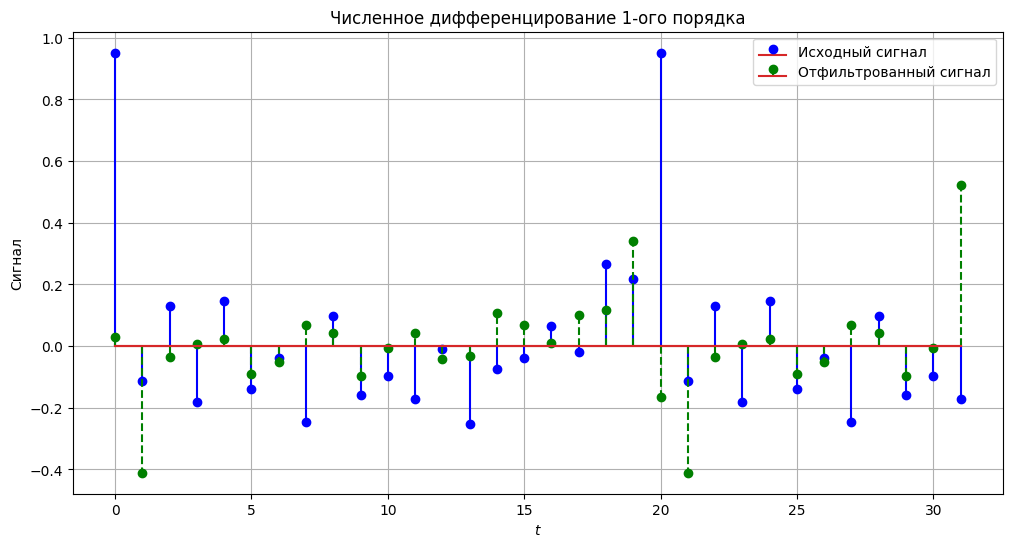

In [31]:
# Реализация численного дифференцирования
def differ(signal):
    return (np.roll(signal, -1) - np.roll(signal, 1)) / 2

# Дифференцирование сигнала
df['diff'] = differ(df['s'])

# Рисуем графики исходного сигнала и дифференцированого
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['diff'], label="Отфильтрованный сигнал", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Численное дифференцирование 1-ого порядка')
plt.legend()
plt.grid()
plt.show()


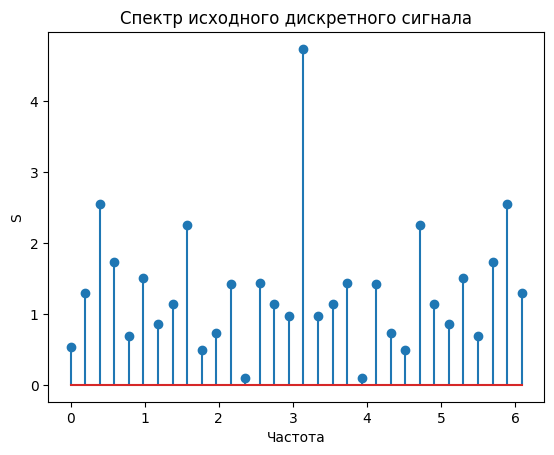

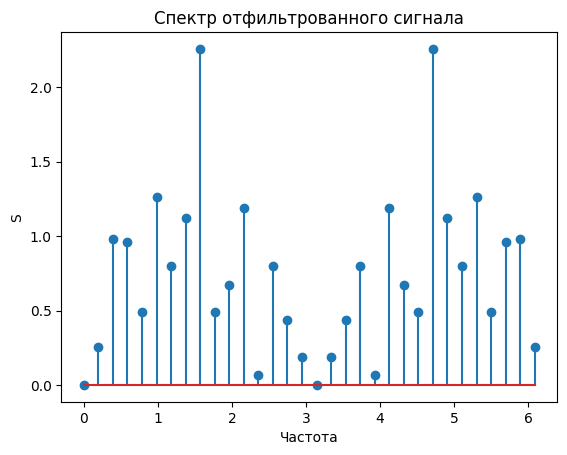

In [32]:
# ДПФ дифференциала сигнала
df['Diff'] = df['t'].apply(lambda n: furie(df['diff'], n))

# Рисуем график спектра исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

# Рисуем график спектра дифференциала
plt.stem(df['w'], np.abs(df['Diff']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр отфильтрованного сигнала')
plt.show()

#### Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).
Численное интегрирование сигнала происходит по формуле:
- для формулы прямоугольников
$$y_{n+1}=y_n+x_{n+\frac12},~y_0=0$$
- для формулы трапеций
$$y_{n+1}=y_n+\frac12(x_n+x_{n+1}),~y_0=0$$
- для формулы Симпсона
$$y_{n+1}=y_n+\frac13(x_{n-1}+4x_n+x_{n+1}),~y_0=0$$

Формулы передаточной функции для интегрирования сигнала имеют вид:
- для формулы прямоугольников
$$H(\omega)=\frac1{2i\sin(\frac12\omega)}$$
- для формулы трапеций
$$H(\omega)=\frac{\cos(\frac12\omega)}{2i\sin(\frac12\omega)}$$
- для формулы Симпсона
$$H(\omega)=\frac{\cos(\omega)+2}{3i\sin(\omega)}$$

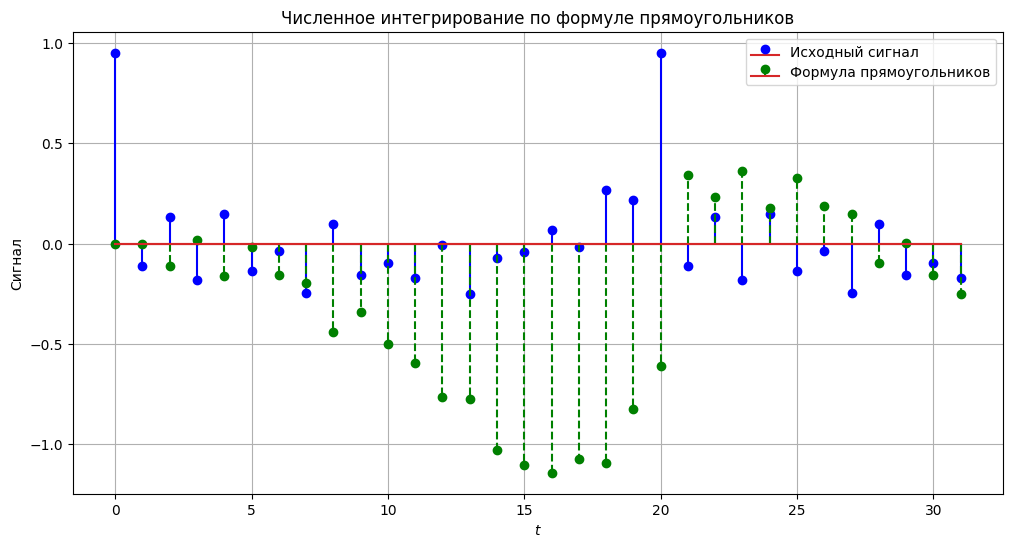

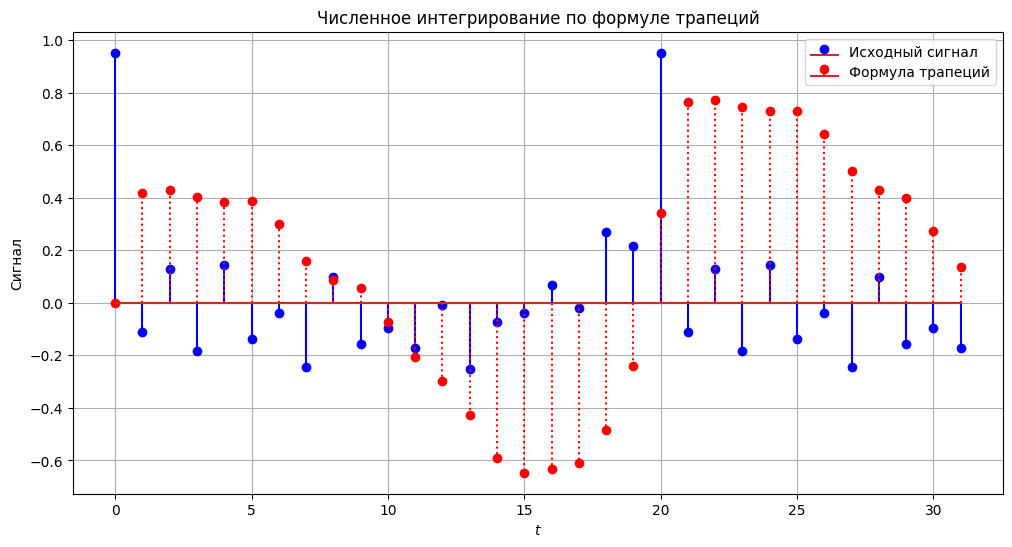

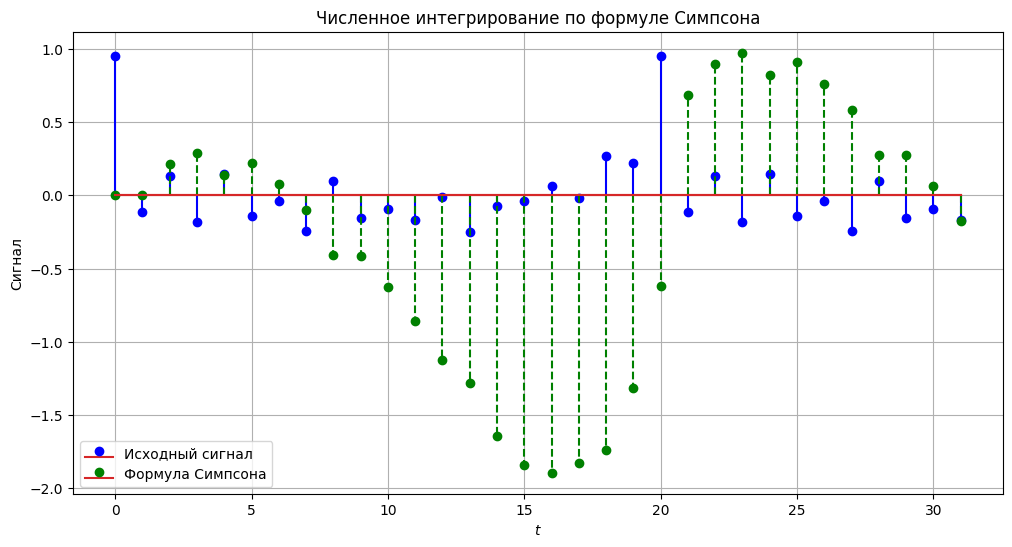

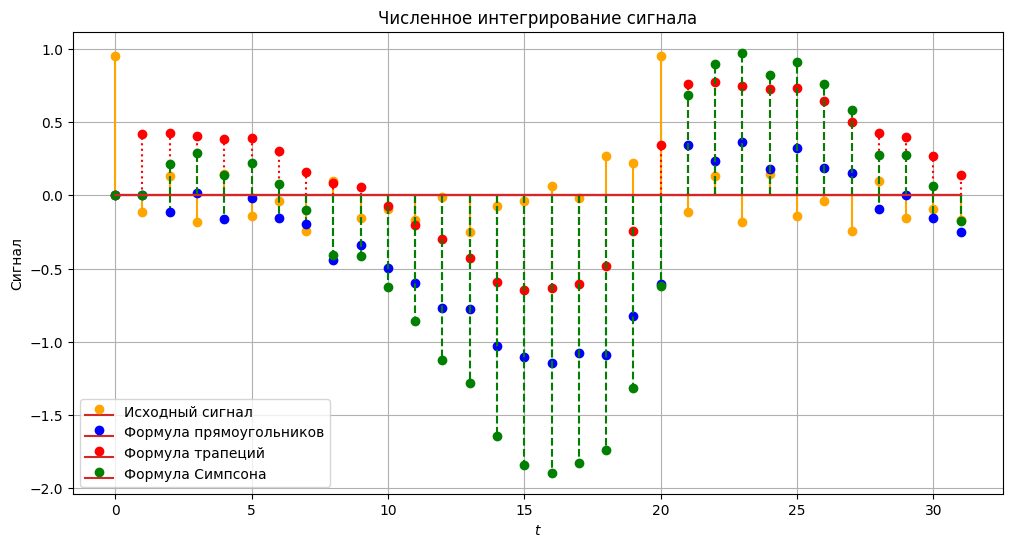

In [37]:
# Реализация численного интегрирования
def integ_rec(x):
    y = np.zeros_like(x)
    for n in range(1, len(x) - 1):
        y[n + 1] = y[n] + x[n]
    return y

def integ_trap(x):
    y = np.zeros_like(x)
    for n in range(len(x) - 1):
        y[n+1] = y[n] + (x[n] + x[n+1]) / 2
    return y

def integ_simpson(x):
    y = np.zeros_like(x)
    for n in range(1, len(x) - 1):
        y[n+1] = y[n] + (x[n-1] + 4 * x[n] + x[n+1]) / 3
    return y

# Интегрирование сигнала
df['rec'] = integ_rec(df['s'])
df['trap'] = integ_trap(df['s'])
df['simpson'] = integ_simpson(df['s'])

# Рисуем графики исходного сигнала и интегрированного прямоуголником
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['rec'], label="Формула прямоугольников", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Численное интегрирование по формуле прямоугольников')
plt.legend()
plt.grid()
plt.show()

# Рисуем графики исходного сигнала и интегрированного трапецией
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['trap'], label="Формула трапеций", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Численное интегрирование по формуле трапеций')
plt.legend()
plt.grid()
plt.show()

# Рисуем графики исходного сигнала и интегрированного Симпсоном
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['simpson'], label="Формула Симпсона", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Численное интегрирование по формуле Симпсона')
plt.legend()
plt.grid()
plt.show()

# Рисуем графики функий интегрирования
plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='orange', markerfmt='o')
plt.stem(df['t'], df['rec'], label="Формула прямоугольников", linefmt='g--', markerfmt='bo')
plt.stem(df['t'], df['trap'], label="Формула трапеций", linefmt='r:', markerfmt='ro')
plt.stem(df['t'], df['simpson'], label="Формула Симпсона", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Численное интегрирование сигнала')
plt.legend()
plt.grid()
plt.show()

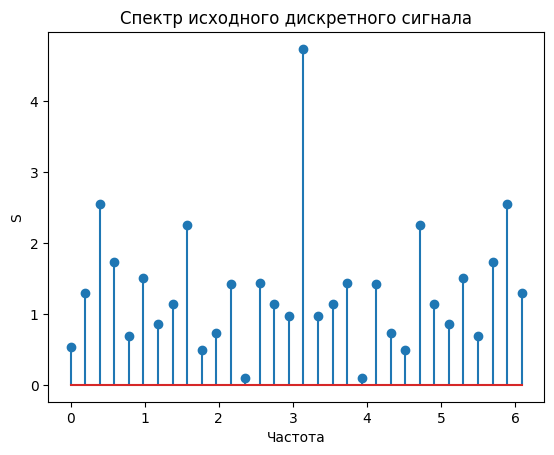

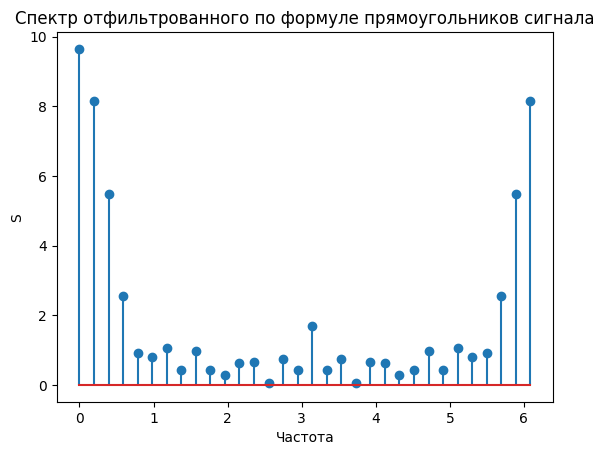

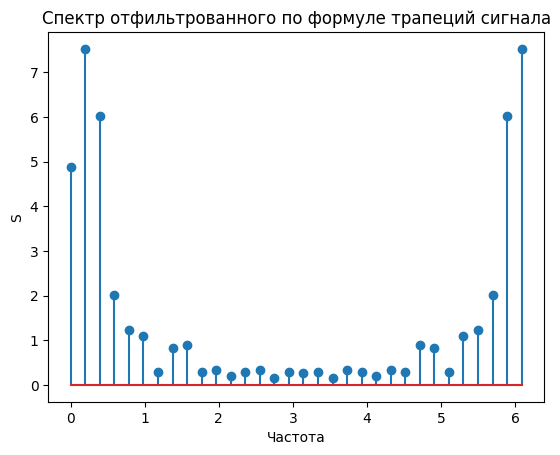

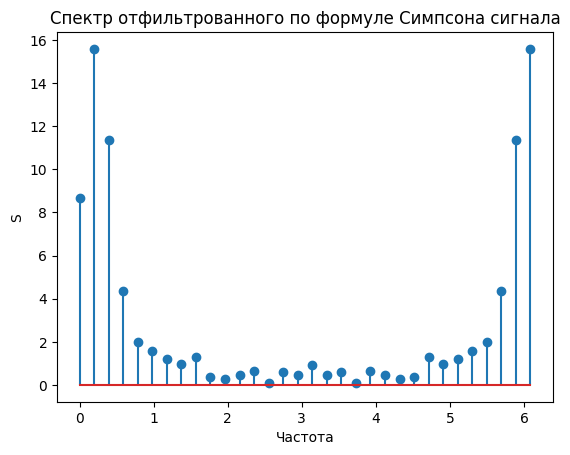

In [34]:
# ДПФ интегралов сигнала
df['Rec'] = df['t'].apply(lambda n: furie(df['rec'], n))
df['Trap'] = df['t'].apply(lambda n: furie(df['trap'], n))
df['Simpson'] = df['t'].apply(lambda n: furie(df['simpson'], n))

# Рисуем график спектра исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

# Рисуем график спектра интегрированного прямоугольником
plt.stem(df['w'], np.abs(df['Rec']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр отфильтрованного по формуле прямоугольников сигнала')
plt.show()

# Рисуем график спектра интегрированного трапецией
plt.stem(df['w'], np.abs(df['Trap']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр отфильтрованного по формуле трапеций сигнала')
plt.show()

# Рисуем график спектра интегрированного Симпсоном
plt.stem(df['w'], np.abs(df['Simpson']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр отфильтрованного по формуле Симпсона сигнала')
plt.show()

## Выводы

1. Фильтрация сигнала:

- Исходный дискретный сигнал, сформированный как комбинация гармоник, был успешно подвергнут численной фильтрации.
- Применение сглаживания с использованием линейных фильтров (на 5 и 9 точек) показало уменьшение высокочастотных компонент, что привело к более плавному сигналу.


2. Дискретное преобразование Фурье (ДПФ):

- Спектры сигналов до и после фильтрации демонстрируют снижение амплитуд высокочастотных составляющих, что соответствует эффекту линейного сглаживания.
- Амплитуды спектров фильтрованных сигналов находятся в соответствии с передаточной функцией 
$H(\omega)$, что подтверждает правильность работы фильтров.


3. Численное дифференцирование:

- Использование фильтра, основанного на численном дифференцировании, показало усиление высокочастотных компонент, что соответствует ожидаемому увеличению отклика на изменения сигнала.
- Спектры дифференцированных сигналов имеют акцент на высоких частотах, что согласуется с теоретической передаточной функцией.


4. Численное интегрирование:

- Фильтры интегрирования (прямоугольников, трапеций, Симпсона) сглаживают сигнал, снижая амплитуды высокочастотных гармоник.
- Различные методы интегрирования показали схожие результаты, с небольшими вариациями в спектре, зависящими от используемой формулы.


5. Анализ и интерпретация:

- Все фильтры продемонстрировали ожидаемое поведение, основанное на их математических основах. Это свидетельствует о корректной реализации численных методов.
- Линейные фильтры и фильтры интегрирования эффективны для подавления шума и сглаживания сигнала, в то время как фильтры дифференцирования усиливают его резкие изменения.


6. Практическое значение:

- Полученные результаты демонстрируют важность выбора фильтра в зависимости от цели обработки сигнала: сглаживание, подавление шума или акцентирование резких изменений.